In [2]:
# read in the data from the csv file
import pandas as pd
import numpy as np
# read in the data from the csv file
data=pd.read_csv("/srv/network_analysis_outputs/SYNGAP1_T1_fanling/ActivityScan_outputs/Compiled_ActivityScan.csv")

In [3]:
# screen CHIP_ID with Active_area consistently smaller than 35 across all 'DIV'
# Group by 'Chip_ID' and 'Well' and find combinations where Active_area is consistently smaller than 35 across all DIV
grouped_data = data.groupby(['Chip_ID', 'Well'])

# Filter out groups where all Active_area values are less than 35
data_screen = grouped_data.filter(lambda x: x['Active_area'].max() < 35)
data_screen

# Display the filtered data
data_screen_unique_units = data_screen.drop_duplicates(subset=['Chip_ID', 'Well'])
data_screen_unique_units

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,Mean_FiringRate,Mean_SpikeAmplitude,Active_area
11,7,4,6,HET,25-Mar-2024 13:49:55,M07036,1.67575,41.449051,7.909091


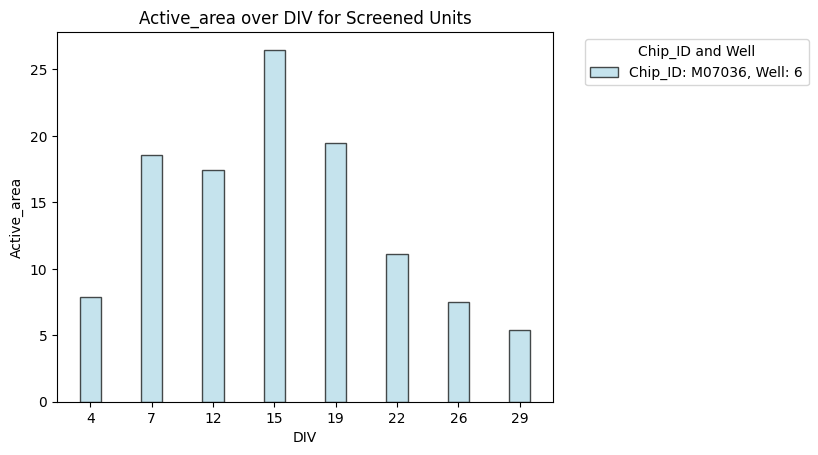

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique DIV values and normalize them to be evenly spaced
div_values = sorted(data_screen['DIV'].unique())
normalized_div = np.linspace(0, 1, len(div_values))

# Create a mapping from actual DIV values to normalized values
div_mapping = {div: norm_div for div, norm_div in zip(div_values, normalized_div)}

# Plotting the screened units using a bar plot
fig, ax = plt.subplots()

for (chip_id, well), group in data_screen.groupby(['Chip_ID', 'Well']):
    # Map the DIV values to the normalized scale
    normalized_group_div = group['DIV'].map(div_mapping)
    ax.bar(normalized_group_div, group['Active_area'], 
           label=f'Chip_ID: {chip_id}, Well: {well}', 
           color='lightblue', 
           width=0.05,  # Adjust width for normalized scale
           alpha=0.7, 
           edgecolor='black')  # Add black edge to the bars

# Set x-axis ticks to the normalized values and label them with the original DIV values
ax.set_xticks(normalized_div)
ax.set_xticklabels(div_values)

ax.set_xlabel('DIV')
ax.set_ylabel('Active_area')
ax.set_title('Active_area over DIV for Screened Units')
ax.legend(title='Chip_ID and Well', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(False)  # Eliminate the grid

plt.show()